# Marriage and Education


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import decorate
from utils import value_counts
from utils import resample_by_cycle
from utils import round_into_bins
from utils import remove_spines

from utils import add_title, add_logo, add_subtext, savefig

from utils import set_palette, resample_by_cycle

from empiricaldist import Pmf, Cdf

<IPython.core.display.Javascript object>

In [4]:
# Make the figures smaller to save some screen real estate.
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = [6.75, 3.5]

# AIBM brand colors
aibm_light_gray = "#F3F4F3"
aibm_medium_gray = "#767676"
aibm_green = "#0B8569"
light_green = "#AAC9B8"
aibm_orange = "#C55300"
light_orange = "#F4A26B"
aibm_purple = "#9657A5"
light_purple = "#CFBCD0"
aibm_blue = "#4575D6"
light_blue = "#C9D3E8"

# additional colors from coolers.co
dark_gray = "#404040"
dark_purple = "#28112B"
dark_green = "#002500"
amber = "#F5BB00"
oxford_blue = "#000022"
bittersweet = "#FF6666"
crimson = "#D62839"

colors = [aibm_orange, aibm_green, aibm_blue, aibm_purple]
cycler = plt.cycler(color=colors)
plt.rc("axes", prop_cycle=cycler)

# tick and label colors
plt.rcParams["axes.edgecolor"] = aibm_medium_gray  # Spines (axis border)
plt.rcParams["xtick.color"] = aibm_medium_gray  # X-axis ticks
plt.rcParams["ytick.color"] = aibm_medium_gray  # Y-axis ticks
plt.rcParams["axes.labelcolor"] = aibm_medium_gray  # Axis labels

# remove all spines
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False

# light gray horizontal grid lines
plt.rcParams["grid.color"] = aibm_light_gray
plt.rcParams["grid.linestyle"] = "-"  # Solid lines
plt.rcParams["grid.linewidth"] = 1  # Thin lines
plt.rcParams["axes.grid"] = True  # Enable grid
plt.rcParams["axes.grid.axis"] = "y"  # Apply only to horizontal lines

# Remove tick marks
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["xtick.minor.size"] = 0
plt.rcParams["ytick.major.size"] = 0
plt.rcParams["ytick.minor.size"] = 0

# Use PT Sans as the default font
plt.rcParams["font.family"] = "PT Sans"

<IPython.core.display.Javascript object>

## Female respondents

Load the data cleaned in `clean_nsfg.ipynb`

In [5]:
resp = pd.read_hdf("FemMarriageData.hdf", "FemMarriageData")
resp.shape

(75769, 49)

<IPython.core.display.Javascript object>

In [6]:
evrmarry = resp["evrmarry"]
value_counts(evrmarry)

,counts
values,
False,36608
True,39161


<IPython.core.display.Javascript object>

In the 2000s cohorts, the last age where we have a decent sample is 23.

In [7]:
subset = resp.query("birth_index==100")
value_counts(subset["ager"]).tail()

,counts
values,
20.0,147
21.0,113
22.0,124
23.0,108
24.0,47


<IPython.core.display.Javascript object>

In the 1990s cohorts, the last age where we have a decent sample is 33.

In [8]:
subset = resp.query("birth_index==90")
value_counts(subset["ager"]).tail()

,counts
values,
30.0,224
31.0,198
32.0,227
33.0,193
34.0,58


<IPython.core.display.Javascript object>

In the 1980s cohorts, the last age where we have a decent sample is 43.

In [9]:
subset = resp.query("birth_index==80")
value_counts(subset["ager"]).tail()

,counts
values,
40.0,191
41.0,181
42.0,152
43.0,136
44.0,48


<IPython.core.display.Javascript object>

In [10]:
def add_married_column(resp, age):
    col = f"married{age}"
    resp[col] = np.nan

    too_young = resp["ager"] < age
    resp.loc[too_young, col] = np.nan

    unmarried = ~resp["evrmarry"]
    resp.loc[unmarried, col] = 0

    married = resp["evrmarry"] & (resp["agemarry"] <= age)
    resp.loc[married, col] = 1

    married = resp["evrmarry"] & (resp["agemarry"] > age)
    resp.loc[married, col] = 0

    too_young = resp["ager"] < age
    resp.loc[too_young, col] = np.nan

    missing = resp["evrmarry"] & resp["agemarry"].isna()
    resp.loc[missing, col] = np.nan

<IPython.core.display.Javascript object>

In [11]:
add_married_column(resp, 23)
value_counts(resp["married23"])

,counts
values,
0.0,35126
1.0,21035
NaN,19608


<IPython.core.display.Javascript object>

In [12]:
add_married_column(resp, 33)
value_counts(resp["married33"])

,counts
values,
0.0,7593
1.0,21896
NaN,46280


<IPython.core.display.Javascript object>

In [13]:
add_married_column(resp, 43)
value_counts(resp["married43"])

,counts
values,
0.0,1176
1.0,5040
NaN,69553


<IPython.core.display.Javascript object>

## Percent married by education level

`anycoll` is a recode I computed, intended to indicate whether a participant attended college, regardless of whether they got a degree.

```
1982    df['anycoll'] = df['educat'] >= 13
1988    df['anycoll'] = df['educat'] >= 13
1995    df["anycoll"] = df["hieduc"] >= 10
2002    df["anycoll"] = df["hieduc"] >= 10
2010    df["anycoll"] = df["hieduc"] >= 10
2013    df["anycoll"] = df["hieduc"] >= 10
2015    df["anycoll"] = df["hieduc"] >= 10
2017    df["anycoll"] = df["hieduc"] >= 10
2019    df["anycoll"] = df["hieduc"] >= 10
2023    df["anycoll"] = df["hieduc"] >= 5
```


In [14]:
resp.groupby("birth_index")["anycoll"].mean()

birth_index
30     0.286154
40     0.422672
50     0.466936
60     0.455427
70     0.528780
80     0.567332
90     0.425998
100    0.195177
Name: anycoll, dtype: float64

<IPython.core.display.Javascript object>

In [15]:
resp.groupby("birth_index")["evrmarry"].mean()

birth_index
30     0.953846
40     0.911031
50     0.815257
60     0.589113
70     0.565568
80     0.410037
90     0.165730
100    0.019970
Name: evrmarry, dtype: float64

<IPython.core.display.Javascript object>

In [16]:
def make_marriage_table(df, col):
    table = df.groupby(["birth_index", "anycoll"])[col].mean().unstack()
    table.columns = ["No college", "Any college"]
    table.index = [1900 + cohort for cohort in table.index]
    return table * 100

<IPython.core.display.Javascript object>

In [17]:
sample = resample_by_cycle(resp)

<IPython.core.display.Javascript object>

In [18]:
table = make_marriage_table(sample, "married23")
table

,No college,Any college
1930,78.099174,66.346154
1940,79.735883,60.739030
1950,71.662853,45.656011
1960,55.123874,33.400371
1970,43.507092,27.504933
1980,32.877087,24.102165
1990,23.039612,18.812565
2000,18.181818,7.142857


<IPython.core.display.Javascript object>

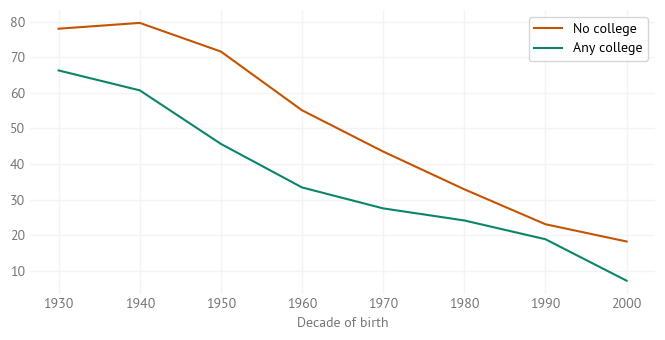

<IPython.core.display.Javascript object>

In [19]:
table.plot()
decorate(xlabel="Decade of birth")

In [20]:
table = make_marriage_table(sample, "married33")

<IPython.core.display.Javascript object>

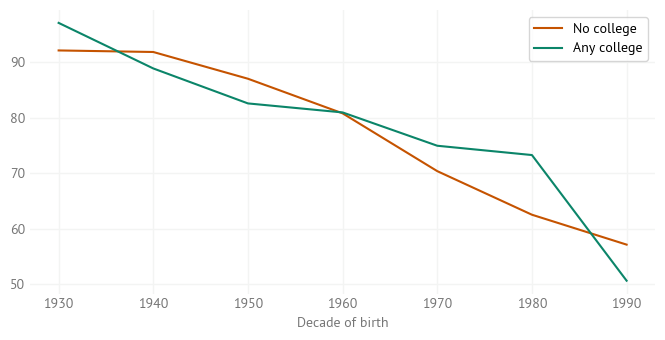

<IPython.core.display.Javascript object>

In [21]:
table.plot()
decorate(xlabel="Decade of birth")

In [22]:
table = make_marriage_table(sample, "married43")

<IPython.core.display.Javascript object>

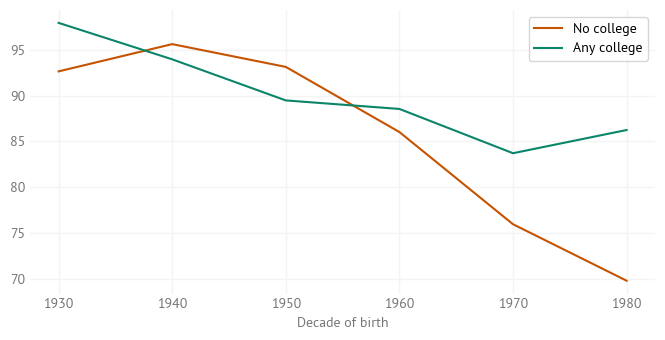

<IPython.core.display.Javascript object>

In [23]:
table.plot()
decorate(xlabel="Decade of birth")

In [24]:
from utils import percentile_rows


def plot_marriage_tables(tables):
    table = tables[0]
    categories = table.columns
    cohorts = table.index

    for col in table.columns:
        frame = pd.DataFrame(columns=cohorts)
        for i, table in enumerate(tables):
            frame.loc[i] = table[col]

        # using the 84% CI, so non-overlapping corresponds to
        # a difference that's significant at 5% level
        low, median, high = percentile_rows(frame, [8, 50, 92])
        plt.fill_between(cohorts, low, high, alpha=0.2)
        plt.plot(cohorts, median, label=col)

<IPython.core.display.Javascript object>

In [25]:
tables23 = [
    make_marriage_table(resample_by_cycle(resp), "married23") for i in range(101)
]

<IPython.core.display.Javascript object>

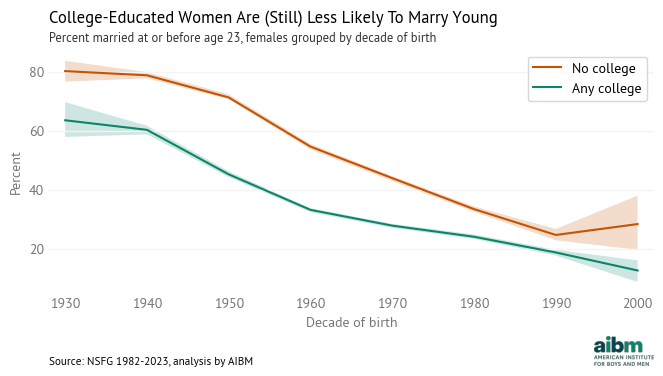

<IPython.core.display.Javascript object>

In [26]:
plot_marriage_tables(tables23)

title = "College-Educated Women Are (Still) Less Likely To Marry Young"
subtitle = "Percent married at or before age 23, females grouped by decade of birth"
add_title(title, subtitle)

subtext = """Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

xlim = [1928, 2002]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim)
inset = add_logo()
savefig("nsfg_marriage", 1, inset)

In [27]:
tables33 = [
    make_marriage_table(resample_by_cycle(resp), "married33") for i in range(101)
]

<IPython.core.display.Javascript object>

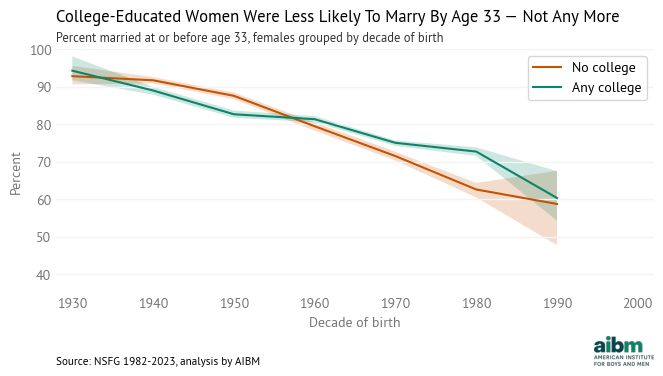

<IPython.core.display.Javascript object>

In [28]:
plot_marriage_tables(tables33)
title = "College-Educated Women Were Less Likely To Marry By Age 33 — Not Any More"
subtitle = "Percent married at or before age 33, females grouped by decade of birth"
add_title(title, subtitle)

subtext = """Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

ylim = [35, 100]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_logo()
savefig("nsfg_marriage", 3, inset)

In [29]:
tables43 = [
    make_marriage_table(resample_by_cycle(resp), "married43") for i in range(101)
]

<IPython.core.display.Javascript object>

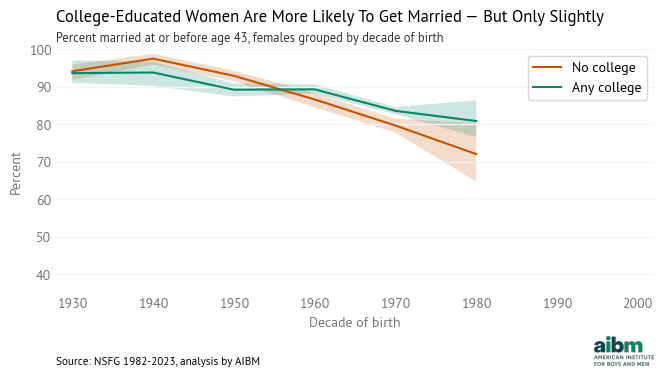

<IPython.core.display.Javascript object>

In [30]:
plot_marriage_tables(tables43)
title = "College-Educated Women Are More Likely To Get Married — But Only Slightly"
subtitle = "Percent married at or before age 43, females grouped by decade of birth"
add_title(title, subtitle)

subtext = """Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_logo()
savefig("nsfg_marriage", 5, inset)

## Male respondents

Load the data cleaned in `clean_nsfg.ipynb`

`anycoll` is a recode I computed, intended to indicate whether a participant attended college, regardless of whether they got a degree.

```
2002    df["anycoll"] = df["hieduc"] >= 10
2010    df["anycoll"] = df["hieduc"] >= 10
2013    df["anycoll"] = df["hieduc"] >= 10
2015    df["anycoll"] = df["hieduc"] >= 10
2017    df["anycoll"] = df["hieduc"] >= 10
2019    df["anycoll"] = df["hieduc"] >= 10
2023    df["anycoll"] = df["hieduc"] >= 5
```

Encoding in 2023

```
HIEDUC: Distribution Value n
Less than high school completion 1 623
12th grade, no diploma 2 169
GED or equivalent 3 153
High school graduate 4 807
Some college, no degree 5 956
Associate degree: occup, tech, or voc 6 353
Associate degree: academic 7 282
Bachelor's degree 8 1267
Master's degree 9 752
Professional degree 10 135
Doctoral degree 11 89
5586
```


In [31]:
resp2 = pd.read_hdf("MaleMarriageData.hdf", "MaleMarriageData")
resp2.shape

(38769, 43)

<IPython.core.display.Javascript object>

In [32]:
evrmarry = resp2["evrmarry"]
value_counts(evrmarry)

,counts
values,
False,24634
True,14135


<IPython.core.display.Javascript object>

In the 2000s cohorts, the last age where we have a decent sample is 23.

In [33]:
subset = resp2.query("birth_index==100")
value_counts(subset["ager"]).tail()

,counts
values,
19.0,221
20.0,76
21.0,83
22.0,91
23.0,80


<IPython.core.display.Javascript object>

In the 1990s cohorts, the last age where we have a decent sample is 33.

In [34]:
subset = resp2.query("birth_index==90")
value_counts(subset["ager"]).tail()

,counts
values,
29.0,170
30.0,130
31.0,150
32.0,165
33.0,101


<IPython.core.display.Javascript object>

In the 1980s cohorts, the last age where we have a decent sample is 43.

In [35]:
subset = resp2.query("birth_index==80")
value_counts(subset["ager"]).tail()

,counts
values,
39.0,202
40.0,131
41.0,135
42.0,116
43.0,83


<IPython.core.display.Javascript object>

In [36]:
add_married_column(resp2, 23)
value_counts(resp2["married23"])

,counts
values,
0.0,22730
1.0,4315
NaN,11724


<IPython.core.display.Javascript object>

In [37]:
add_married_column(resp2, 33)
value_counts(resp2["married33"])

,counts
values,
0.0,6188
1.0,8426
NaN,24155


<IPython.core.display.Javascript object>

In [38]:
add_married_column(resp2, 43)
value_counts(resp2["married43"])

,counts
values,
0.0,1032
1.0,2630
NaN,35107


<IPython.core.display.Javascript object>

## Percent married by education level

In [39]:
resp2.groupby("birth_index")["anycoll"].mean()

birth_index
50     0.509317
60     0.511914
70     0.564968
80     0.518885
90     0.346049
100    0.131521
Name: anycoll, dtype: float64

<IPython.core.display.Javascript object>

In [40]:
resp2.groupby("birth_index")["evrmarry"].mean()

birth_index
50     0.695652
60     0.694424
70     0.611974
80     0.317966
90     0.087660
100    0.006576
Name: evrmarry, dtype: float64

<IPython.core.display.Javascript object>

In [41]:
tables23 = [
    make_marriage_table(resample_by_cycle(resp2), "married23") for i in range(101)
]

<IPython.core.display.Javascript object>

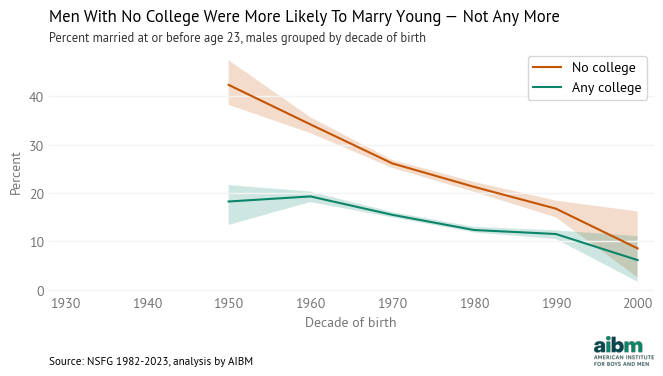

<IPython.core.display.Javascript object>

In [42]:
plot_marriage_tables(tables23)

title = "Men With No College Were More Likely To Marry Young — Not Any More"
subtitle = "Percent married at or before age 23, males grouped by decade of birth"
add_title(title, subtitle)

subtext = """Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

xlim = [1928, 2002]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim)
inset = add_logo()
savefig("nsfg_marriage", 2, inset)

In [43]:
tables33 = [
    make_marriage_table(resample_by_cycle(resp2), "married33") for i in range(101)
]

<IPython.core.display.Javascript object>

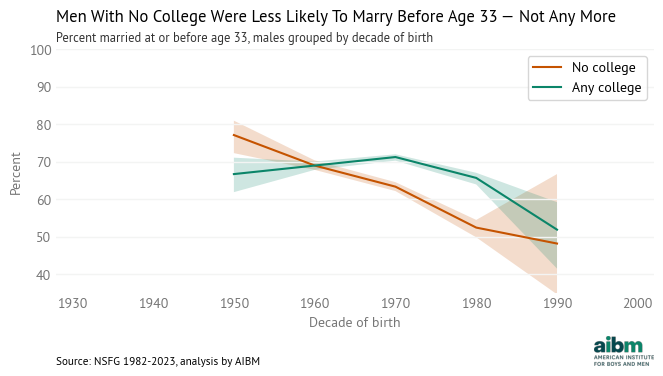

<IPython.core.display.Javascript object>

In [44]:
plot_marriage_tables(tables33)
title = "Men With No College Were Less Likely To Marry Before Age 33 — Not Any More"
subtitle = "Percent married at or before age 33, males grouped by decade of birth"
add_title(title, subtitle)

subtext = """Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

ylim = [35, 100]
decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_logo()
savefig("nsfg_marriage", 4, inset)

In [45]:
tables43 = [
    make_marriage_table(resample_by_cycle(resp2), "married43") for i in range(101)
]

<IPython.core.display.Javascript object>

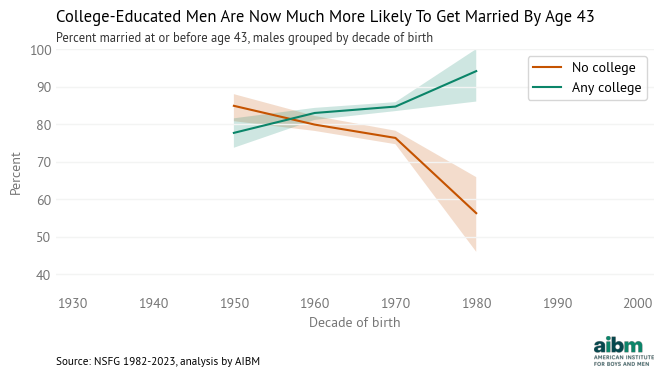

<IPython.core.display.Javascript object>

In [46]:
plot_marriage_tables(tables43)
title = "College-Educated Men Are Now Much More Likely To Get Married By Age 43"
subtitle = "Percent married at or before age 43, males grouped by decade of birth"
add_title(title, subtitle)

subtext = """Source: NSFG 1982-2023, analysis by AIBM"""
add_subtext(subtext)

decorate(xlabel="Decade of birth", ylabel="Percent", xlim=xlim, ylim=ylim)
inset = add_logo()
savefig("nsfg_marriage", 6, inset)